In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv", header=1)

In [4]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


Data Cleaning

In [6]:
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [7]:
dataset.loc[:122, "Region"] = 0;
dataset.loc[122:, "Region"] = 1;

In [8]:
dataset[["Region"]] = dataset[["Region"]].astype(int)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 29.0+ KB


In [10]:
#remove null values
dataset= dataset.dropna().reset_index(drop=True)

In [11]:
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [12]:
dataset.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [13]:
dataset=dataset.drop(122).reset_index(drop=True)

In [14]:
dataset.iloc[[1]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0


In [15]:
dataset.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [16]:
# fix spaces in column names
dataset.columns = dataset.columns.str.strip()

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


In [18]:
## Change the required columns as integer datatype
dataset[['month', 'day', 'year', 'Temperature', "RH", 'Ws']] = dataset[['month', 'day', 'year', 'Temperature', "RH", 'Ws']].astype(int)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [19]:
# Changing other columns to float datatype
objects = [ feature for feature in dataset.columns if dataset[feature].dtypes == 'O']
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [20]:
for i in objects:
    if i!= 'Classes': # Classes is not float value
        dataset[i] = dataset[i].astype(float)

In [21]:
## Lets save the cleaned dataset
dataset.to_csv('Algerian_forest_fires_cleaned1_dataset.csv', index=False)

In [22]:
df = dataset.copy()
df.info()
df['Classes'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [23]:
df['Classes'] = (
    df['Classes']
      .astype(str)                      # in case there were NaNs or numbers
      .str.lower()                      # ignore case
      .str.replace(r'\s+', ' ', regex=True)  # "not   fire" → "not fire"
      .str.strip()                      # remove leading / trailing blanks
)

In [24]:
df['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [25]:
df['Classes'] = np.where(df['Classes'] == 'not fire', 0, 1)


In [26]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

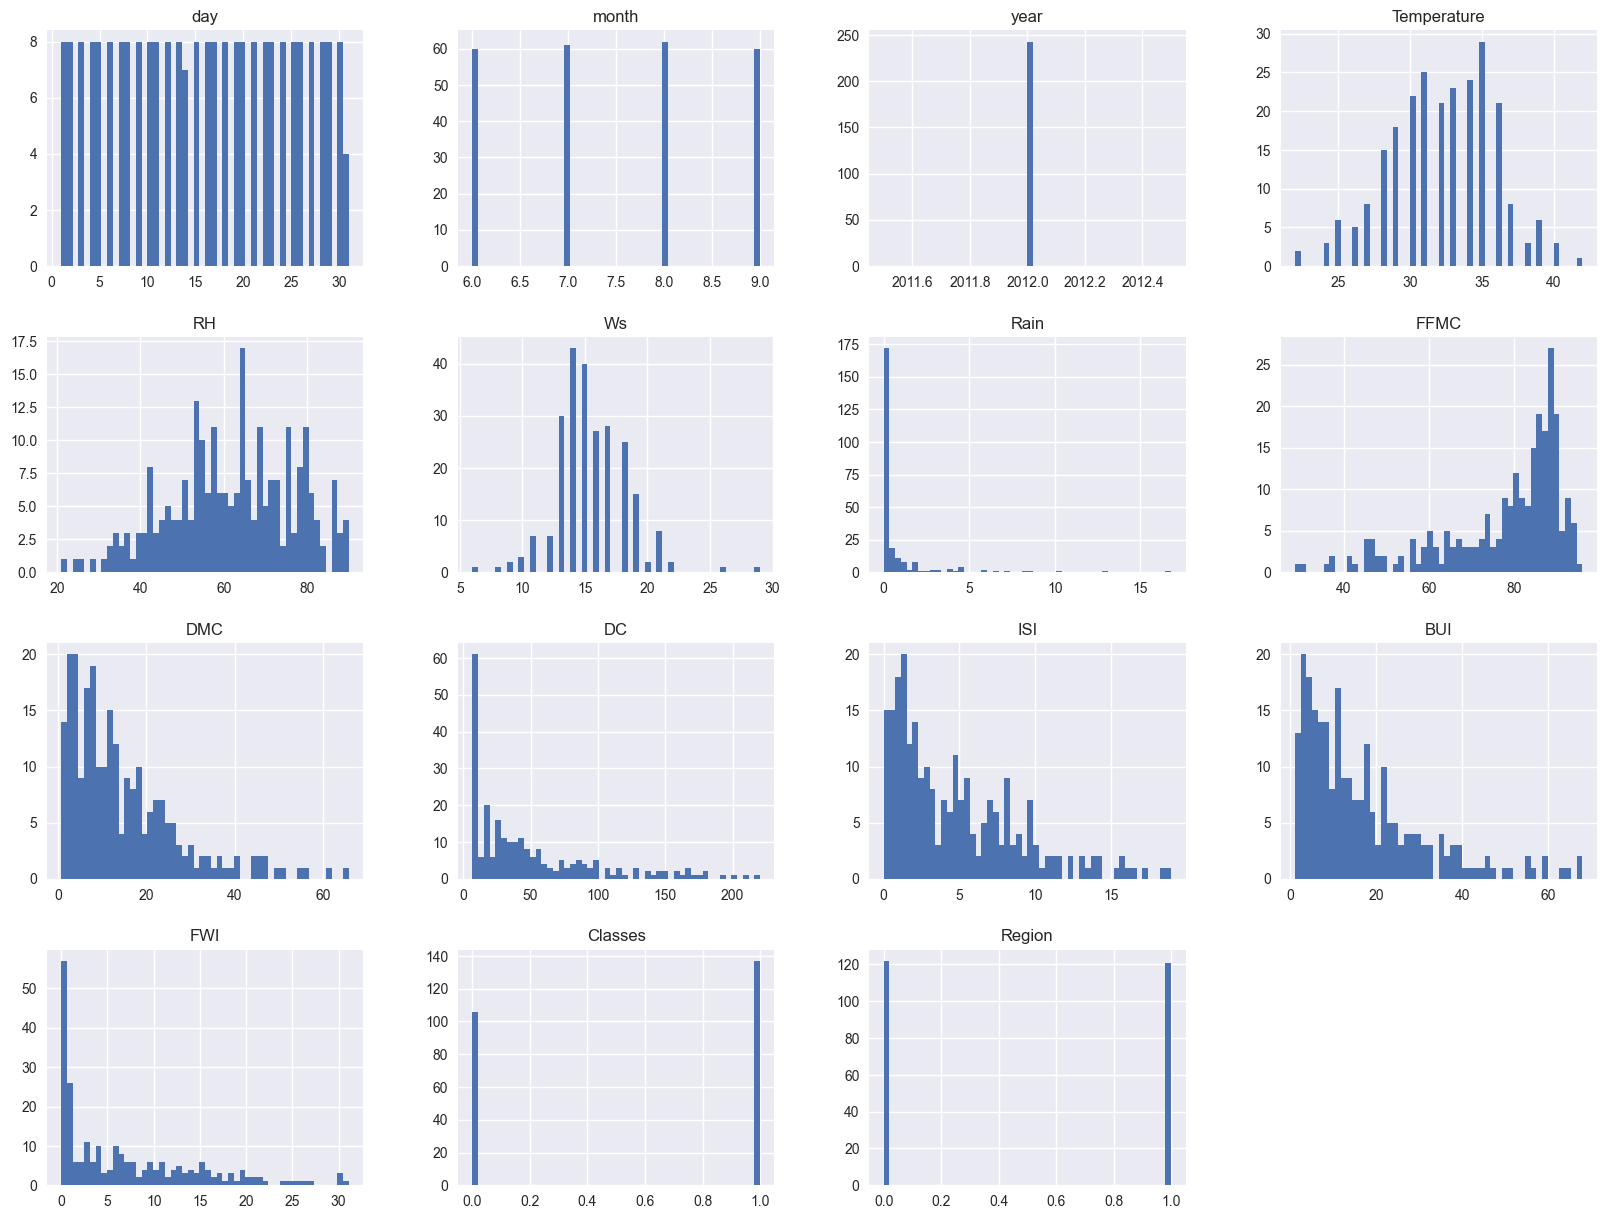

In [27]:
### Plot density for all features

plt.style.use('seaborn-v0_8')
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [28]:
# Percentage for pie chart
percentage = df['Classes'].value_counts(normalize=True)*100

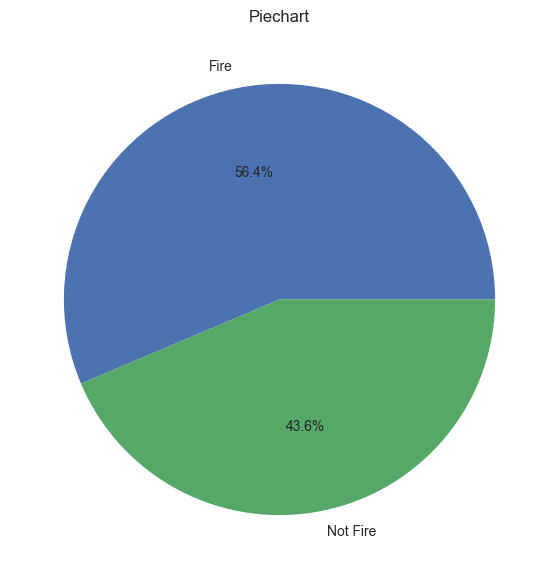

In [29]:
# Plotting pie chart
classlabels = ["Fire", "Not Fire"]
plt.figure(figsize=(12, 7))
plt.pie(percentage,labels=classlabels, autopct='%1.1f%%')
plt.title('Piechart')
plt.show()

In [30]:
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840,0.000821
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734


<Axes: >

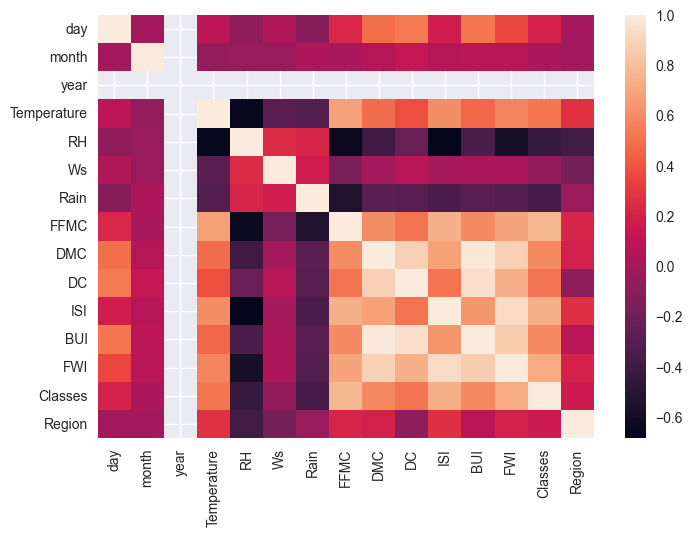

In [31]:
sns.heatmap(df.corr())

<Axes: ylabel='FWI'>

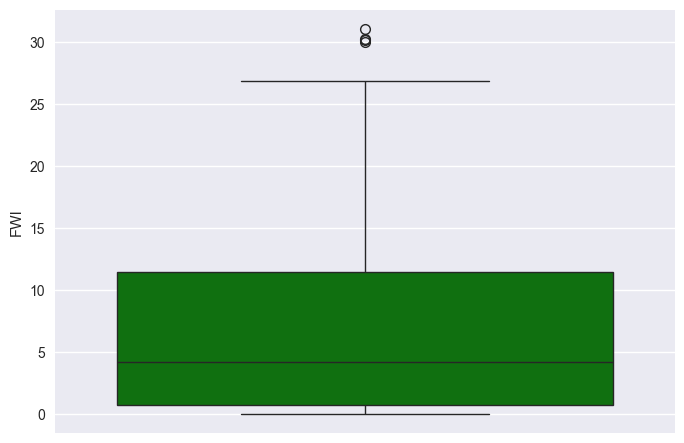

In [32]:
## Box Plots
sns.boxplot(df['FWI'], color='green')

In [34]:
dataset['Classes'] = (dataset['Classes'].astype(str) .str.replace(r'\s+', ' ', regex=True).str.strip())             # in case there were NaNs or numbers.str.lower()                      # ignore case
  # "not   fire" → "not fire"
                         # remove leading / trailing blanks


Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Regions')

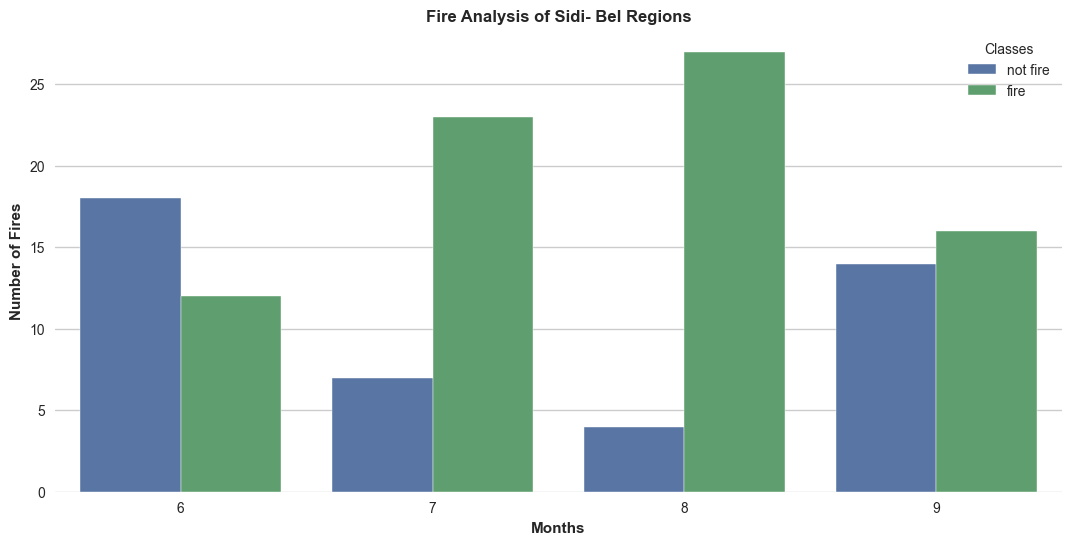

In [36]:
## Monthly Fire Analysis
dftemp=dataset.loc[dataset['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=dftemp)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')

Text(0.5, 1.0, 'Fire Analysis of Brjaia Regions')

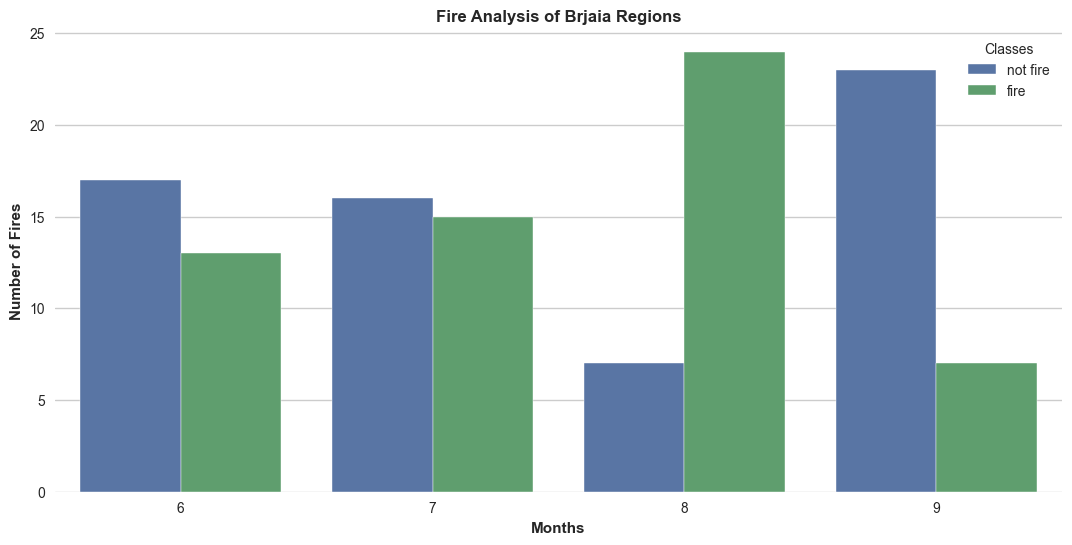

In [105]:
dftemp1 = dataset.loc[dataset['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data=dftemp1)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Brjaia Regions",weight='bold')

In [ ]:
## Feature Engineering

df2 = pd.read_csv('Algerian_forest_fires_cleaned1_dataset.csv')

In [47]:
df2.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:

df2.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [50]:
df2['Classes'] = np.where(df2['Classes'].astype(str).str.contains('not fire'),0,1)

In [51]:
df2['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [53]:
#Independent and Dependent Features
X = df2.drop('FWI', axis=1)
y = df['FWI']

In [54]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [55]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
## Feature Selection based on Correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653725,-0.308149,-0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,0.539642,0.258344
RH,-0.653725,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,-0.454926,-0.408441
Ws,-0.308149,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,-0.075322,-0.202357
Rain,-0.313112,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,-0.378585,-0.057382
FFMC,0.690285,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.786012,0.254770
DMC,0.468911,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.606775,0.188980
DC,0.372163,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.538893,-0.083038
ISI,0.613138,-0.714640,-0.002300,-0.349903,0.751819,0.679049,0.512934,1.000000,0.637669,0.740072,0.291889
BUI,0.446280,-0.346511,0.037465,-0.299179,0.598248,0.983891,0.946181,0.637669,1.000000,0.602102,0.090326
Classes,0.539642,-0.454926,-0.075322,-0.378585,0.786012,0.606775,0.538893,0.740072,0.602102,1.000000,0.196276


<Axes: >

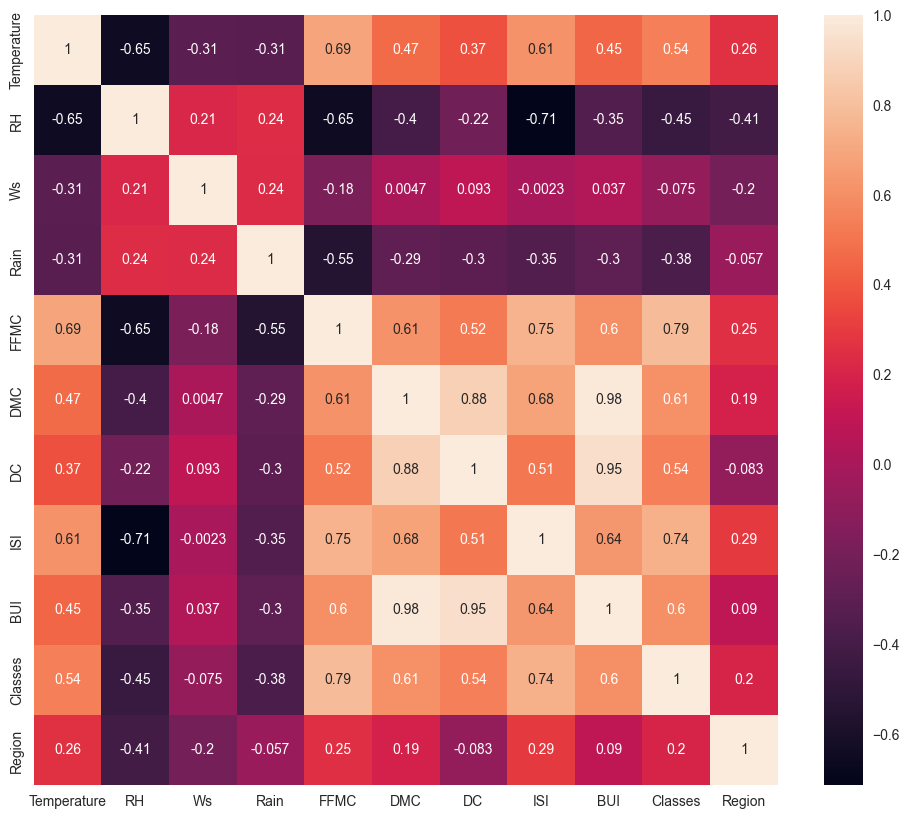

In [59]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr, annot=True)

In [61]:
def correlation(df, threshold):
    col_corr = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [65]:
## Threshhold-- Domain expertise
corr_features = correlation(X_train, 0.85)

In [66]:
## drop features where corr is more than 0.85
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((194, 9), (49, 9))

In [70]:
## Feature Scaling or Standartising
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

Text(0.5, 1.0, 'X_train afterScaling')

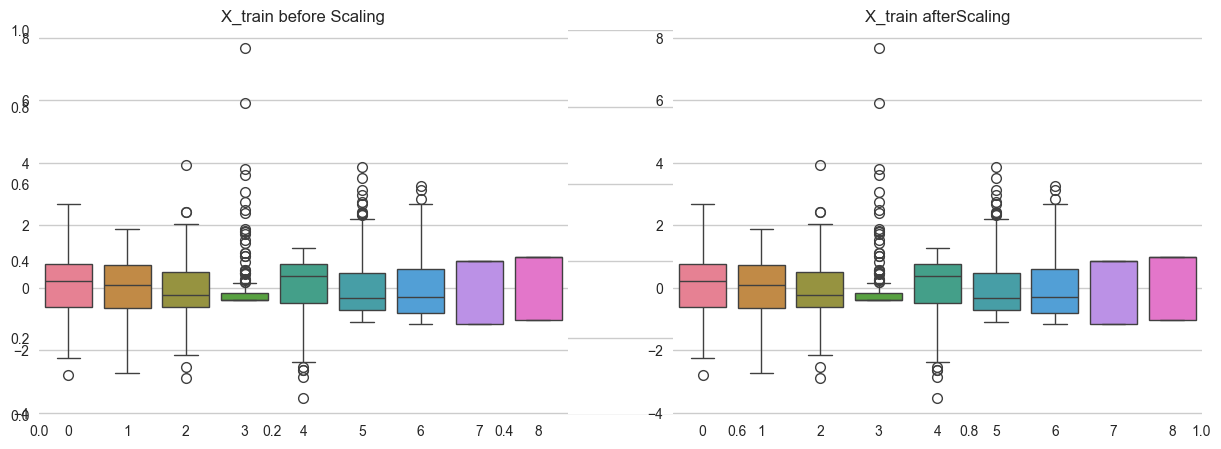

In [71]:
## Box plots to understand effect of standard scaler
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train before Scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scale)
plt.title("X_train afterScaling")



Linear Regression Model


Mean absolute Error 0.5049978694165688
R2 Score 0.9805895859259882


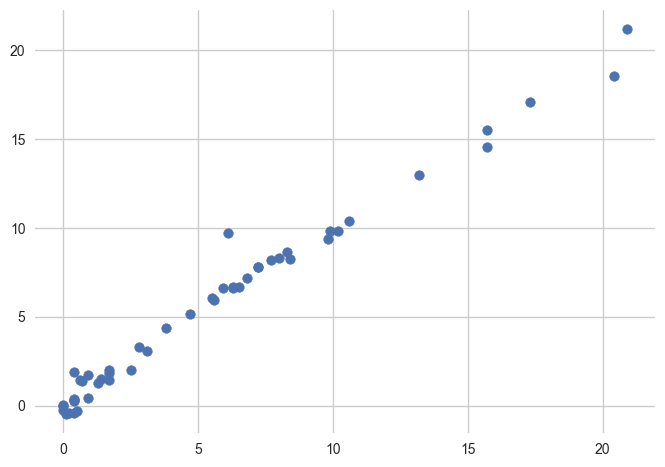

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

regressor = LinearRegression()
regressor.fit(X_train_scale, y_train)
y_pred = regressor.predict(X_test_scale)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute Error", mae)
print("R2 Score", score)
plt.scatter(y_test, y_pred)

Lasso Regression

Mean absolute Error 1.0093958923873405
R2 Score 0.9430507350726564


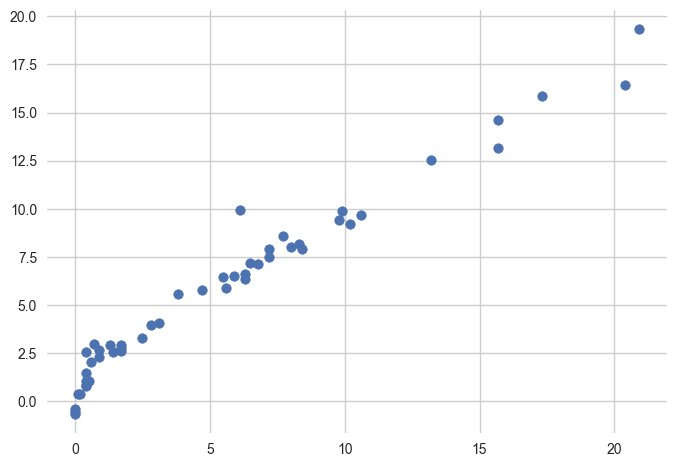

In [80]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

lasso = Lasso()
lasso.fit(X_train_scale, y_train)
y_pred = lasso.predict(X_test_scale)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute Error", mae)
print("R2 Score", score)
plt.scatter(y_test, y_pred)

In [ ]:
#Cross Validation Lasso
# LassoCV is for multiple alphas
from sklearn.linear_model import LassoCV
lassocv  = LassoCV(cv=5) # Without giving alphas values you can give n_alphas(no. of alphas u need) and it generates alpha values
lassocv.fit(X_train_scale, y_train)


LassoCV(cv=5)

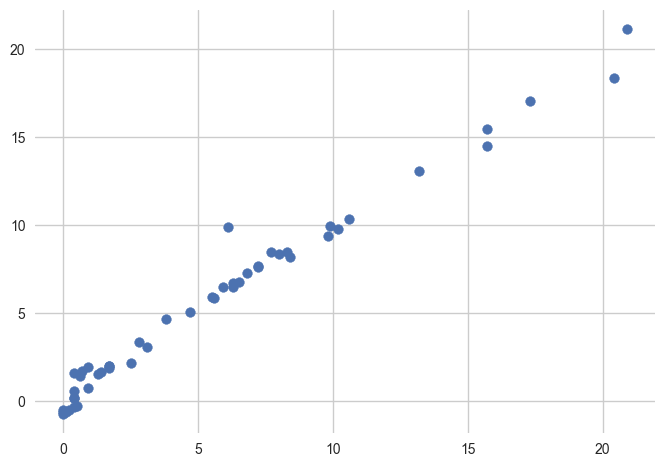

In [95]:
y_pred = lassocv.predict(X_test_scale)
plt.scatter(y_test, y_pred)

Mean absolute Error 0.5556715031617869
R2 Score 0.978328234520343


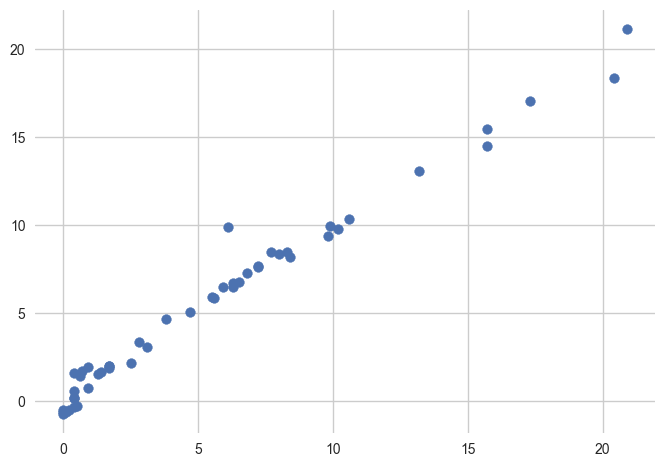

In [96]:
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute Error", mae)
print("R2 Score", score)
plt.scatter(y_test, y_pred)

Ridge Regression

Mean absolute Error 0.5192048325844741
R2 Score 0.9801058063273601


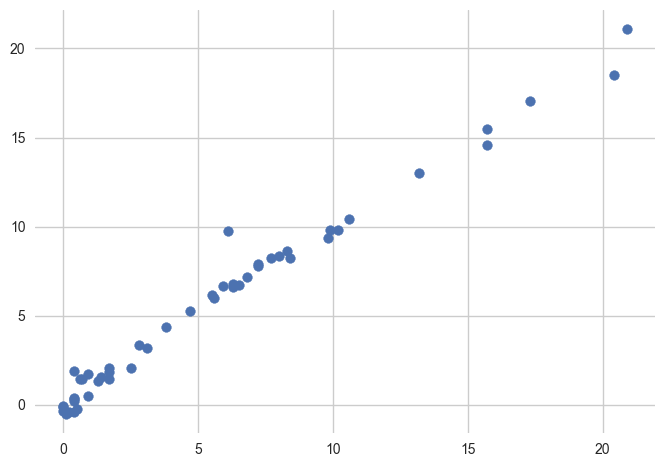

In [81]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

ridge= Ridge()
ridge.fit(X_train_scale, y_train)
y_pred = ridge.predict(X_test_scale)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute Error", mae)
print("R2 Score", score)
plt.scatter(y_test, y_pred)

Mean absolute Error 0.6869262008277106
R2 Score 0.9722193780965628


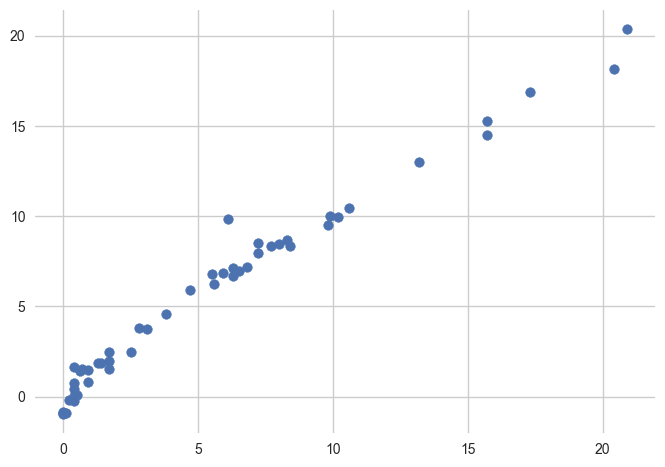

In [97]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scale,y_train )
y_pred = ridgecv.predict(X_test_scale)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute Error", mae)
print("R2 Score", score)
plt.scatter(y_test, y_pred)

In [ ]:
ridgecv.alpha_

np.float64(10.0)

In [99]:
ridgecv.gcv_mode

Elasticnet Regression

Mean absolute Error 1.6834416340136709
R2 Score 0.8676961352267808


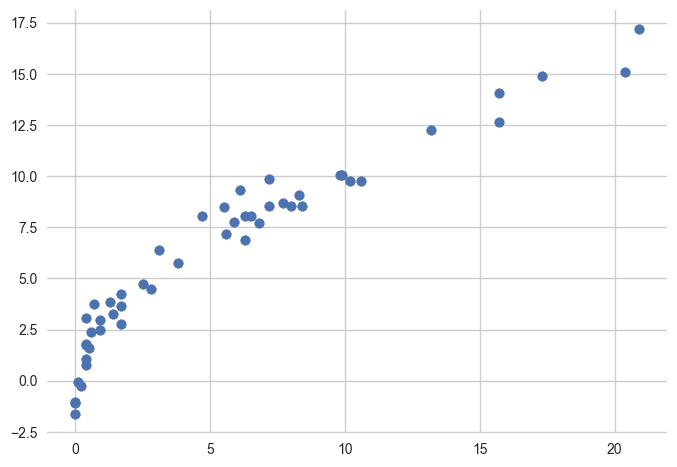

In [82]:
## Combination on ridge and lasso(if we want to combine both)
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score

en= ElasticNet()
en.fit(X_train_scale, y_train)
y_pred = en.predict(X_test_scale)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute Error", mae)
print("R2 Score", score)
plt.scatter(y_test, y_pred)

Mean absolute Error 0.5710147088777221
R2 Score 0.9781014571778188


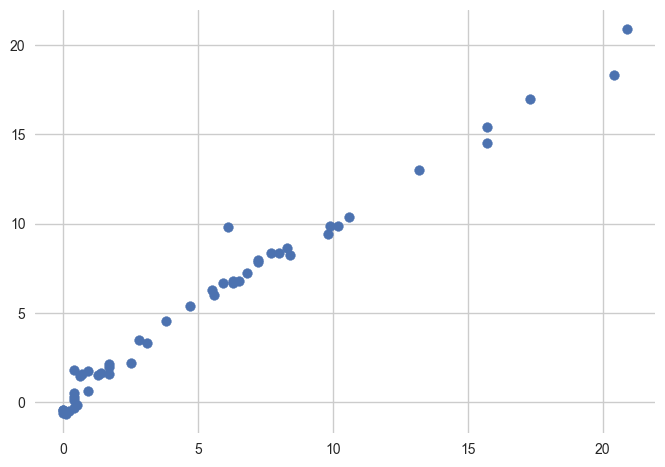

In [100]:
from sklearn.linear_model import ElasticNetCV
elcv = ElasticNetCV(cv=5)
elcv.fit(X_train_scale,y_train )
y_pred = elcv.predict(X_test_scale)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute Error", mae)
print("R2 Score", score)
plt.scatter(y_test, y_pred)

In [106]:
## Pickling
scaler

StandardScaler()

In [107]:
ridge

Ridge()

In [108]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(ridge, open('ridge.pkl', 'wb'))